In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

# Your Data

Given a certain amount_spent by the customer, we decide whether or not to give a discount. Let's set 1 if the customer gets the discount and 0 if he doesn't.

In [2]:
data = OrderedDict(
        amount_spent =  [50,  10, 20, 5,  95,  70,  100,  200, 0],
        send_discount = [0,   1,  1,  1,  0,   0,   0,    0,   1]
    )     

In [3]:
df = pd.DataFrame.from_dict(data)
df

,amount_spent,send_discount
0,50,0
1,10,1
2,20,1
3,5,1
4,95,0
5,70,0
6,100,0
7,200,0
8,0,1


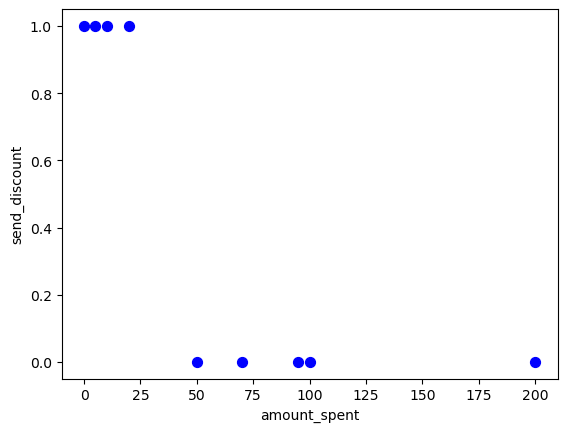

In [4]:
df.plot.scatter(x='amount_spent', y='send_discount', s=50, c="blue");

# Logistic Regression

In [5]:
X = df['amount_spent'].astype('float').values
y = df['send_discount'].astype('float').values

In [24]:
class LogisticRegressor:
    def sigmoid(z):
        return 1/(1+np.exp(-z))
  
    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        if X.ndim == 1:
            X = X.reshape(-1, 1)  # Ensure X has 2 dimensions
        return np.concatenate((intercept, X), axis=1)

    def predict_probs(self, X):
        X = self._add_intercept(X)
        return sigmoid(np.dot(X, self.W))
  
    def predict(self, X):
        return self.predict_probs(X).round()

    def fit(self, X, y, n_iter=100000, lr=0.01):
        X = self._add_intercept(X)
        self.W = np.zeros(X.shape[1])
        for i in range(n_iter):
            z = np.dot(X, self.W)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.W -= lr * gradient
        return self

In [25]:
regressor = LogisticRegressor().fit(X, y)

Using the regressor to decide who should receive discount.

In [26]:
X_test = np.array([10, 250]) # two amount_spent values to test 
X_test = X_test.reshape(X_test.shape[0], 1)
y_test = regressor.predict(X_test)
y_test

array([1., 0.])